# Ex) Approximations of $\pi$ function

__<div style="text-align: right"> EE370: Software lab, Kyung Hee University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@khu.ac.kr) </div>_
_<div style="text-align: right"> Kunwoo Park (kunwoopark@khu.ac.kr) </div>_

In our first assignment, we've worked on the prime-counting function, which we call the _$\pi$ function_. Interestingly, there have been several trials to formalize the $\pi$ function by using several methods, among which you can use $\large{{x \over {\text{ln}x}}}$. Here are some useful inequalities for $\pi{(x)}$ implemented by $\large{{x \over {\text{ln}x}}}$.

$${x \over {\text{ln}x}}<\pi{(x)}<1.25506{x \over {\text{ln}x}}$$ 

for $x \geq 17$.

In this problem, you will be developing a code that plots functions which approximate $\pi(x)$ and compare them with the original $\pi(x)$. For those of you who didn't accomplish first assignment, here is some code for computigng $\pi(x)$, developed by one of your classmates.

In [ ]:
def Eratosthenes(n):
  
  prime_numbers = []

  if(n < 2):
    return prime_numbers
 
  else:
    consecutive_int = list((range(n+1)))
    mark = [1 for i in range(n+1)]
    for p in range(2, n+1):
      if(mark[p]):
        prime_numbers.append(consecutive_int[p])
        for i in range(2*p, n+1, p):
          mark[i] = 0
      p += 1
    return prime_numbers


def pi(n):
  return len(Eratosthenes(n))

<br>

_**(Problem 1)**_ Compute the three functions in the above inequalities and plot the results for $x=17, 18, \dots, 999,1000$.

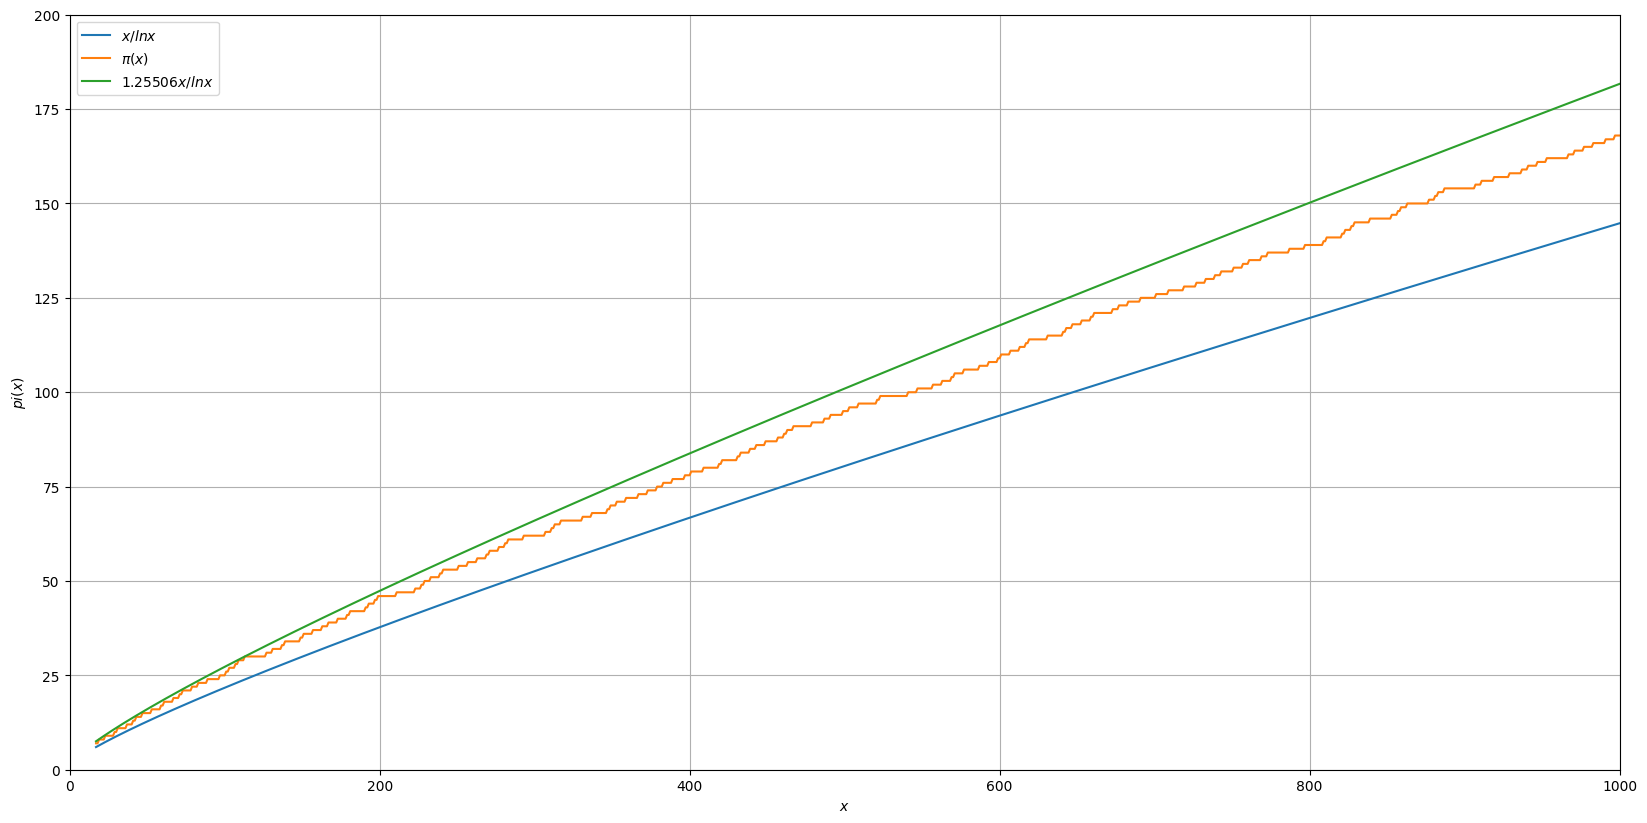

In [1]:
import matplotlib.pyplot as plt #pi함수 실행한 후에 확인 가능.
import numpy as np

def Eratosthenes(n):
  
  prime_numbers = []

  if(n < 2):
    return prime_numbers
 
  else:
    consecutive_int = list((range(n+1)))
    mark = [1 for i in range(n+1)]
    for p in range(2, n+1):
      if(mark[p]):
        prime_numbers.append(consecutive_int[p])
        for i in range(2*p, n+1, p):
          mark[i] = 0
      p += 1
    return prime_numbers


def pi(n):
  return len(Eratosthenes(n))

#1 왜 안됨? 형을 맞춰줘야함. np.arange 형태?
'''
t=np.arange(17,1001,1)

x1 = t / np.log(t)
x2 = pi(t)  
x3 = 1.25506 * t / np.log(t)

plt.figure(figsize=(20,10), dpi =100)
plt.plot(t,x1,label=r'$x/logx$')
plt.plot(t,x2,label=r'$pi(x)$')
plt.plot(t,x3,label=r'$1.25506x/logx$')

plt.xlabel(r'$x$') #수직축 이름. r'$ $'==>수식같은 글씨체로 나온다.
plt.ylabel(r'$pi(x)$') # 수평축 이름
plt.xlim(0,1000) #범위 지정
plt.ylim(0,200) 
plt.grid() #격자선
plt.legend() #범례
plt.show()
print(type(t))
''' 

x1 = []
x2 = []
x3 = []

for i in range(17,1001):
  x1.append( i / np.log(i))
  x2.append(pi(i))  
  x3.append(1.25506 * i / np.log(i))

x = x=[i for i in range(17,1001)]

plt.figure(figsize=(20,10), dpi =100)
plt.plot(x,x1,label=r'$x/lnx$')
plt.plot(x,x2,label=r'$\pi(x)$')  #\표시하면 pi가 나옴.
plt.plot(x,x3,label=r'$1.25506x/lnx$')

plt.xlabel(r'$x$') #수직축 이름. r'$ $'==>수식같은 글씨체로 나온다.
plt.ylabel(r'$pi(x)$') # 수평축 이름
plt.xlim(0,1000) #범위 지정
plt.ylim(0,200) 
plt.grid() #격자선
plt.legend() #범례
plt.show()



<br>

The offset logarithmic integral function, ${\rm Li}(x)$, is another function that can represent $\pi{(x)}$ for all sufficiently large values of $x$. ${\rm  Li}(x)$ is defined as the below.
$$\int_{2}^{x} {1 \over {\text{ln}(t)}} dt$$
You can numerically compute the definite integral by using the `scipy.integrate.quad()` function. For example, $\int_{0}^{1} {\text{ln}(x^2)} dx$ can be calculated by the following code.

In [ ]:
from scipy.integrate import quad

fx = lambda x: np.log(x**2) #log의 밑이 딱히 없으면 ln으로 인식
val,err=quad( fx, 0, 1 )
print(val)

-1.9999999999999998


<br>

_**(Problem 2)**_ Plot ${\rm Li}(x)$ for $x=17, 18, \dots, 999,1000$, and compare the result with the one you obtained from Problem 1.

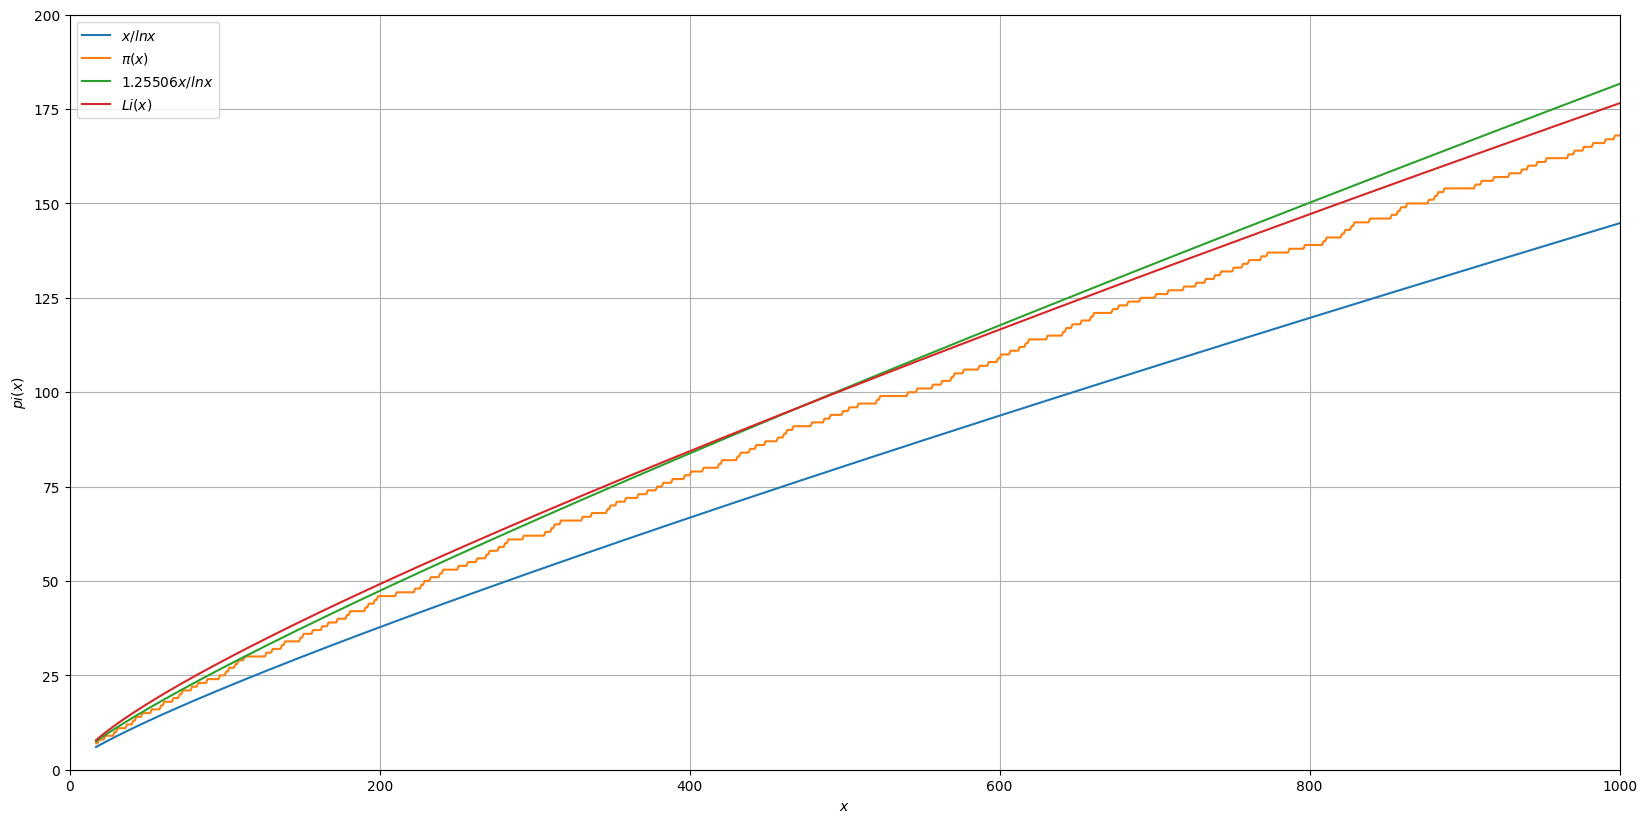

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad

def Eratosthenes(n):
  
  prime_numbers = []

  if(n < 2):
    return prime_numbers
 
  else:
    consecutive_int = list((range(n+1)))
    mark = [1 for i in range(n+1)]
    for p in range(2, n+1):
      if(mark[p]):
        prime_numbers.append(consecutive_int[p])
        for i in range(2*p, n+1, p):
          mark[i] = 0
      p += 1
    return prime_numbers


def pi(n):
  return len(Eratosthenes(n))

x = x=[i for i in range(17,1001)]

x1 = []
x2 = []
x3 = []
x4 = []

for i in range(17,1001):
  x1.append( i / np.log(i))
  x2.append(pi(i))  
  x3.append(1.25506 * i / np.log(i))

  fx = lambda i: 1 / np.log(i) #log의 밑이 딱히 없으면 ln으로 인식
  val,err=quad( fx, 2, i )
  x4.append(val)



plt.figure(figsize=(20,10), dpi =100)
plt.plot(x,x1,label=r'$x/lnx$')
plt.plot(x,x2,label=r'$\pi(x)$')  #\표시하면 pi가 나옴.
plt.plot(x,x3,label=r'$1.25506x/lnx$')
plt.plot(x,x4,label=r'$Li(x)$')

plt.xlabel(r'$x$') #수직축 이름. r'$ $'==>수식같은 글씨체로 나온다.
plt.ylabel(r'$pi(x)$') # 수평축 이름
plt.xlim(0,1000) #범위 지정
plt.ylim(0,200) 
plt.grid() #격자선
plt.legend() #범례
plt.show()


<br>

A brilliant mathematician created an incredible formula to approximate $\pi{(x)}$ as below. 

$$
R(x)=1+\sum_{k=1}^{\infty} {(\text{ln} (x))^k \over {k!k\,\zeta(k+1)}}
$$

This called the _Riemann's R-function_, and the $\zeta(s)$ is called the _Riemann zeta function_ which is defined as follows:

$$ 
\zeta (s)=\sum _{n=1}^{\infty }{\frac {1}{n^{s}}}
$$

You may make use the `scipy.special.zeta()` and `scipy.special.factorial()` from the `scipy` library, in order to compute the R-function. Here are some examples for using those function.

In [ ]:
from scipy.special import factorial,zeta
print(factorial(3)) # print 3!
print(zeta(3)) #print zeta(3)

6.0
1.2020569031595942


<br>

_**(Problem 3)**_ You will not be able to calculate the above function with large $k$'s. So, we are going to limit $k$ to $K$ and will approximate the R-function with the following.

$$
R_K(x)=1+\sum_{k=1}^{K} {(\text{ln} (x))^k \over {k!k \zeta(k+1)}}
$$

Calculate $R_K$-function using scipy library and compare your results for $x=17, 18, \dots, 999,1000$ with the original $\pi{(x)}$. You are recommended to examine your approximations with different $K$'s, for example, $K=10,12,14$.

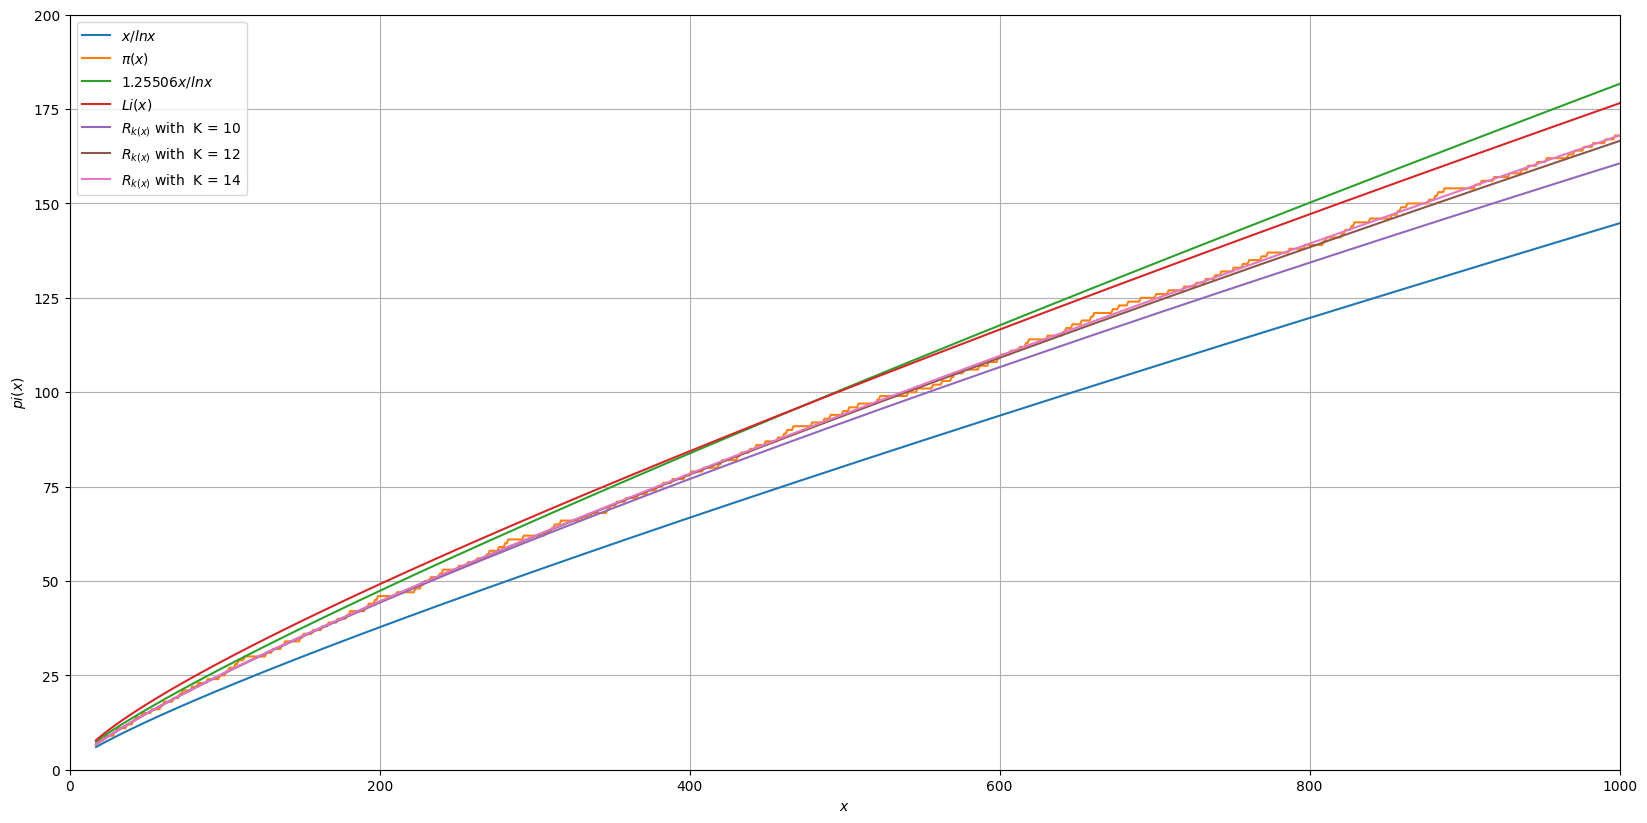

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
from scipy.special import factorial,zeta

def Eratosthenes(n):
  
  prime_numbers = []

  if(n < 2):
    return prime_numbers
 
  else:
    consecutive_int = list((range(n+1)))
    mark = [1 for i in range(n+1)]
    for p in range(2, n+1):
      if(mark[p]):
        prime_numbers.append(consecutive_int[p])
        for i in range(2*p, n+1, p):
          mark[i] = 0
      p += 1
    return prime_numbers


def pi(n):
  return len(Eratosthenes(n))

def Rk(n,x): #Rk(X) 함수 구현
  rk = 0
  for i in range (1,n+1):
    rk+= ( (np.log(x)**i) / (factorial(i) * i * zeta(i+1)) )

  rk += 1
  return rk  


x = x=[i for i in range(17,1001)]

x1 = []
x2 = []
x3 = []
x4 = []
x5 = []
x6 = []
x7 = []

for i in range(17,1001):
  fx = lambda i: 1 / np.log(i) #log의 밑이 딱히 없으면 ln으로 인식
  val,err=quad( fx, 2, i )

  x1.append( i / np.log(i))
  x2.append(pi(i))  
  x3.append(1.25506 * i / np.log(i))
  x4.append(val)
  x5.append(Rk(10,i))
  x6.append(Rk(12,i))
  x7.append(Rk(14,i))



plt.figure(figsize=(20,10), dpi =100)
plt.plot(x,x1,label=r'$x/lnx$')
plt.plot(x,x2,label=r'$\pi(x)$')  #\표시하면 pi가 나옴.
plt.plot(x,x3,label=r'$1.25506x/lnx$')
plt.plot(x,x4,label=r'$Li(x)$')
plt.plot(x,x5,label=r'$R_{k(x)}$ with  K = 10') #_{kx()} ==>아래 첨자 옵션. r-string에서 $ $사이에만 적용.
plt.plot(x,x6,label=r'$R_{k(x)}$ with  K = 12')
plt.plot(x,x7,label=r'$R_{k(x)}$ with  K = 14')

plt.xlabel(r'$x$') #수직축 이름. r'$ $'==>수식같은 글씨체로 나온다.
plt.ylabel(r'$pi(x)$') # 수평축 이름
plt.xlim(0,1000) #범위 지정
plt.ylim(0,200) 
plt.grid() #격자선
plt.legend() #범례
plt.show()


<br>

_**(Problem 3)**_ Compare the approximation errors for the above approximations, on logarithmic scales. You may define the approximation error of the ${\rm Li}(x)$ function as follows.

$$
\epsilon_{{\rm Li}}(x) = | {\rm Li}(x) - \pi(x) |
$$

Briefly explain what you observed from these numerical experiments.

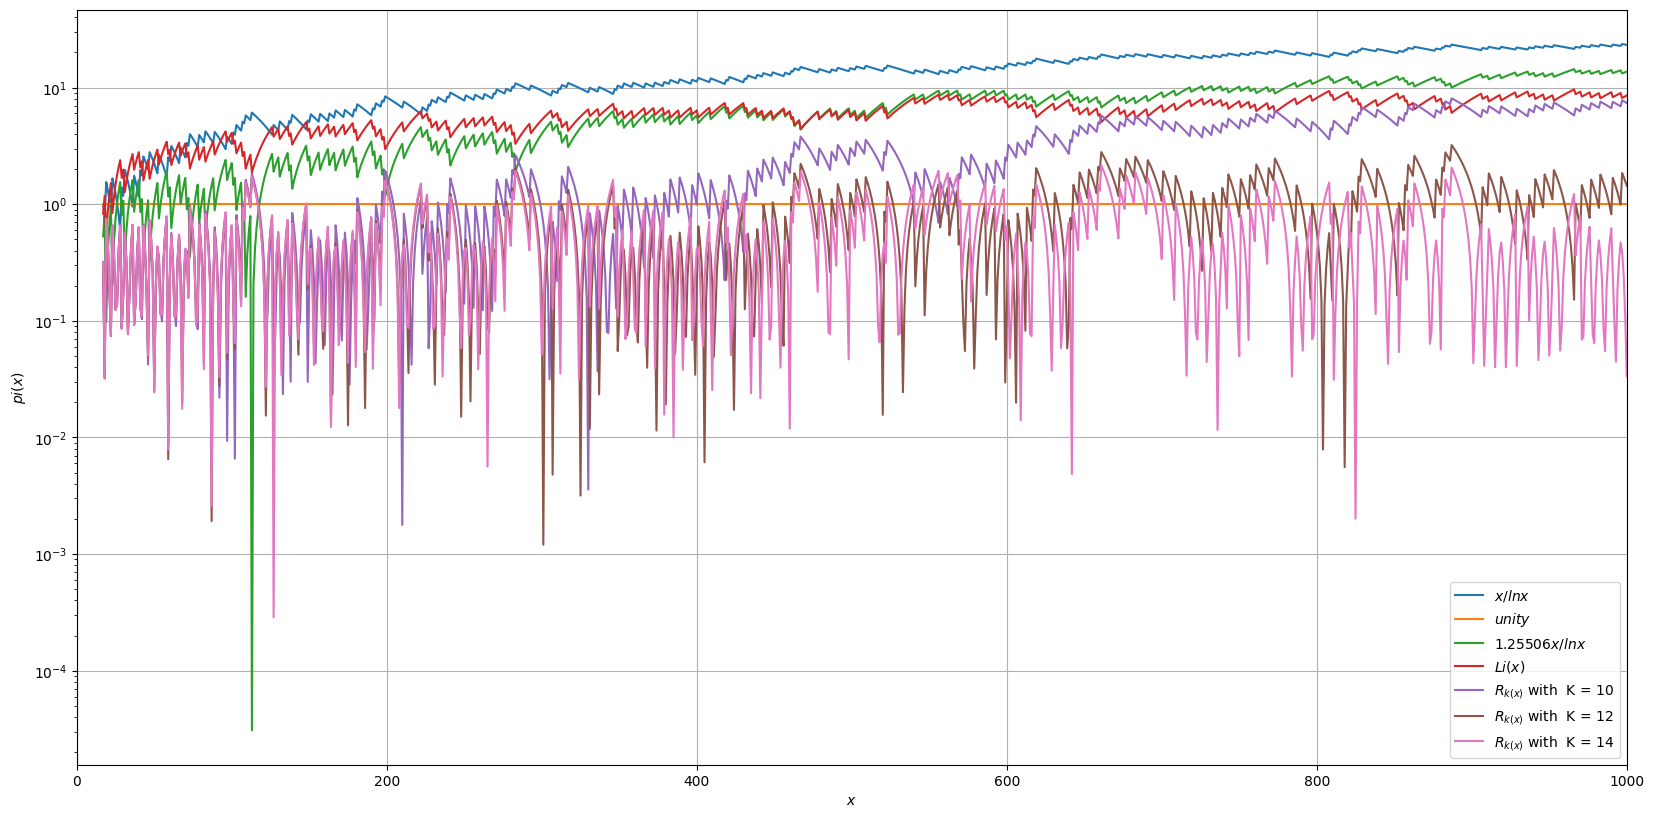

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
from scipy.special import factorial,zeta

def Eratosthenes(n):
  
  prime_numbers = []

  if(n < 2):
    return prime_numbers
 
  else:
    consecutive_int = list((range(n+1)))
    mark = [1 for i in range(n+1)]
    for p in range(2, n+1):
      if(mark[p]):
        prime_numbers.append(consecutive_int[p])
        for i in range(2*p, n+1, p):
          mark[i] = 0
      p += 1
    return prime_numbers


def pi(n):
  return len(Eratosthenes(n))

def Rk(n,x): #Rk(x) 함수 구현
  rk = 0
  for i in range (1,n+1):
    rk+= ( (np.log(x)**i) / (factorial(i) * i * zeta(i+1)) )

  rk += 1
  return rk  


x = x=[i for i in range(17,1001)]

x1 = []
x2 = []
x3 = []
x4 = []
x5 = []
x6 = []
x7 = []

for i in range(17,1001): # pi와의 차를 인자로 넣기 위해서
  fx = lambda i: 1 / np.log(i) #log의 밑이 딱히 없으면 ln으로 인식
  val,err=quad( fx, 2, i )

  x1.append( abs(i / np.log(i) - pi(i)))
  x2.append(1)  
  x3.append(abs(1.25506 * i / np.log(i) - pi(i)))
  x4.append(abs(val - pi(i) ))
  x5.append(abs(Rk(10,i) - pi(i)))
  x6.append(abs(Rk(12,i) - pi(i)))
  x7.append(abs(Rk(14,i) - pi(i))) 



plt.figure(figsize=(20,10), dpi =100)
plt.plot(x,x1,label=r'$x/lnx$')
plt.plot(x,x2,label=r'$unity$')  #\표시하면 pi가 나옴.
plt.plot(x,x3,label=r'$1.25506x/lnx$')
plt.plot(x,x4,label=r'$Li(x)$')
plt.plot(x,x5,label=r'$R_{k(x)}$ with  K = 10') #_{kx()} ==>아래 첨자 옵션. r-string에서 $ $사이에만 적용.
plt.plot(x,x6,label=r'$R_{k(x)}$ with  K = 12')
plt.plot(x,x7,label=r'$R_{k(x)}$ with  K = 14')

plt.xlabel(r'$x$') #수직축 이름. r'$ $'==>수식같은 글씨체로 나온다.
plt.ylabel(r'$pi(x)$') # 수평축 이름
plt.xlim(0,1000) #범위 지정
plt.yscale('log')
plt.grid() #격자선
plt.legend() #범례
plt.show()



In [ ]:
π(x)에서 x가 200정도 이하일 때는 x/lnx , 1.25506x/lnx , Li(x)도 π(x)와의 오차가 그렇게 크지 않아 π(x)를 대신하는 근사치로 사용될 수 있겠지만 
x가 더 클 경우엔 오차가 점점 커져 이땐 π(x)를 그대로 사용하거나 Rk(X) 함수에서 k를 12이상으로 설정하는 것이 prime counting에 도움될 것이라고 생각한다. 